# Parcels plotting methods
**Disclaimer: This tutorial demonstrates the simple plotting functionality included in Parcels. For high quality analysis it is recommended to create your own code. [This tutorial](https://nbviewer.jupyter.org/github/OceanParcels/parcels/blob/master/parcels/examples/tutorial_output.ipynb) shows how to start a more advanced analysis.** 

The `show()` method of the `Particelset` class is capable of plotting the particle locations and velocity fields in scalar and vector form. In this notebook, we demonstrate these capabilities using the GlobCurrent dataset. We begin by importing the relevant modules.

In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4
from datetime import timedelta, datetime

We then instatiate a `FieldSet` with the velocity field data from GlobCurrent dataset.

In [2]:
filenames = {'U': "GlobCurrent_example_data/20*.nc",
             'V': "GlobCurrent_example_data/20*.nc"}
variables = {'U': 'eastward_eulerian_current_velocity',
             'V': 'northward_eulerian_current_velocity'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions)

Next, we instantiate a `ParticeSet` composed of `JITParticles`:

In [3]:
pset = ParticleSet.from_line(fieldset=fieldset, size=5, pclass=JITParticle,
                             start=(31, -31), finish=(32, -31), time=datetime(2002, 1, 1))

Given this `ParticleSet`, we can now explore the different features of the `show()` method. To start, let's simply call `show()` with no arguments.

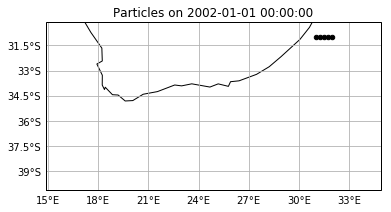

In [4]:
pset.show()

Then, let's advect the particles starting on January 1, 2002 for a week.

In [5]:
pset.execute(AdvectionRK4, runtime=timedelta(days=7), dt=timedelta(minutes=5))

INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/r2/8593q8z93kd7t4j9kbb_f7p00000gr/T/parcels-504/3bd9e4d852563dc46b1da38336ff2dec.so
100% (604800.0 of 604800.0) |############| Elapsed Time: 0:00:00 Time:  0:00:00


If we call `show()` again, we will see that the particles have been advected:

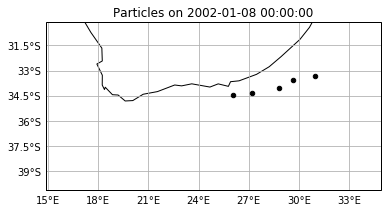

In [6]:
pset.show()

To plot without the continents on the same plot, add `land=False`.

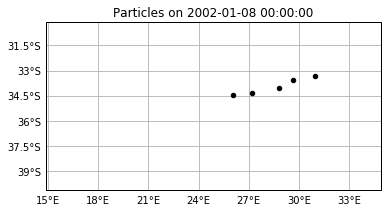

In [7]:
pset.show(land=False)

To set the domain of the plot, we specify the domain argument. The format `domain` expects a dictionary with entries `{'S', 'N', 'E', 'W'}` for South, North, East and West extent, respectively. Note that the plotted domain is found by interpolating the user-specified domain onto the velocity grid. For instance,

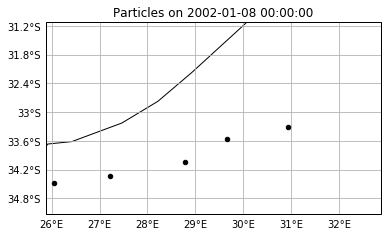

In [8]:
pset.show(domain={'N':-31, 'S':-35, 'E':33, 'W':26})

We can also easily display a scalar contour plot of a single component of the velocity vector field. This is done by setting the `field` argument equal to the desired scalar velocity field.

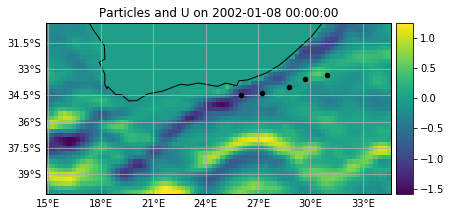

In [9]:
pset.show(field=fieldset.U)

To plot the scalar U velocity field at a different date and time, we set the argument `show_time` equal to a `datetime` or `timedelta` object or simply the number of seconds since the time origin. For instance, let's view the U field on January, 10, 2002 at 2 PM.

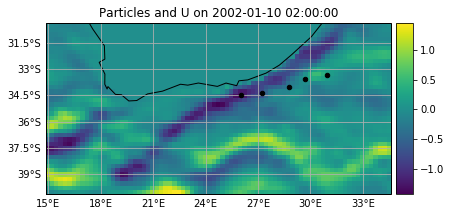

In [10]:
pset.show(field=fieldset.U, show_time=datetime(2002, 1, 10, 2))

Note that the particle locations do not change, but remain at the locations corresponding to  the end of the last integration. To remove them from the plot, we set the argument `with_particles` equal to `False`.

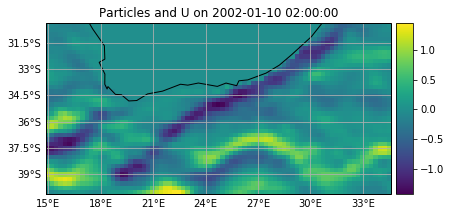

In [11]:
pset.show(field=fieldset.U, show_time=datetime(2002, 1, 10, 2), with_particles=False)

By setting the `field` argument equal to `vector`, we can display the velocity in full vector form.

/Users/erik/miniconda2/envs/py2_parcels_cartopy/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1744: RuntimeWarning: invalid value encountered in less
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/erik/miniconda2/envs/py2_parcels_cartopy/lib/python2.7/site-packages/cartopy/mpl/geoaxes.py:1744: RuntimeWarning: invalid value encountered in greater
  u, v = self.projection.transform_vectors(t, x, y, u, v)


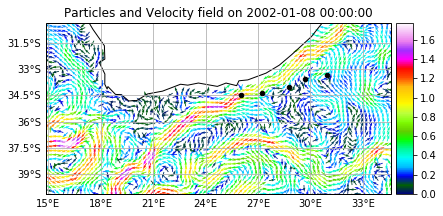

In [12]:
pset.show(field='vector')

The normalized vector field is colored by speed. To control the maximum speed value on the colorbar, set the `vmax` argument equal to the desired value.

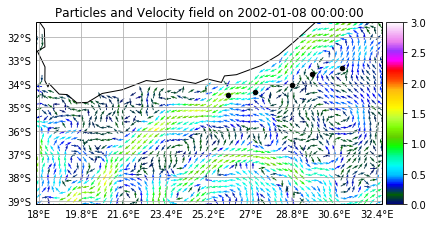

In [13]:
pset.show(field='vector', vmax=3.0, domain={'N':-31, 'S':-39, 'E':33, 'W':18})

We can change the projection of the plot by providing one of the [projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) from `cartopy`. For example, to plot on a Robinson projection , we use `projection=cartopy.crs.Robinson()`. Note that not all projections support gridlines, so these may not be shown.

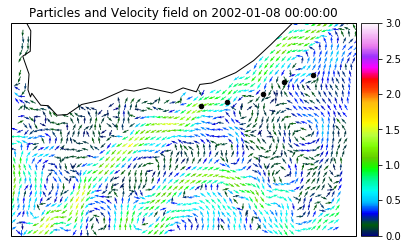

In [14]:
try:  # Within a try/pass for unit testing on machines without cartopy installed
    import cartopy
    pset.show(field='vector', vmax=3.0, domain={'N':-31, 'S':-39, 'E':33, 'W':18}, projection=cartopy.crs.Robinson())
except:
    pass

If we want to save the file rather than show it, we set the argument `savefile` equal to the `'path/to/save/file'`.

In [15]:
pset.show(field='vector', vmax=3.0, domain={'N':-31, 'S':-39, 'E':33, 'W':18}, land=True, savefile='particles')

INFO: Plot saved to particles.png
